
<br>
<font>
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=150 height=150> <br>
<font color=0F5298 size=7>
Machine Learning <br>
<font color=2565AE size=5>
Computer Engineering Department <br>
Fall 2024<br>
<font color=3C99D size=5>
Practical Assignment 5 - Clustering <br>
<font color=696880 size=4>
Mahan Bayhaghi


____

In [ ]:
# Please fill in your name and student number
Name = 'Radin'
StudentNumber = 'Cheraghi'

# Hard Clustering (30 points)

In this section, you will be implementing two of the most well-known hard clustering methods: **K-Means** and **DBSCAN**.
Given a dataset $ X $ consisting of $ n $ data points, partition the data into $ k $ distinct clusters (for K-Means) or identify dense regions of data points (for DBSCAN). Hard clustering assigns each data point to exactly one cluster without overlap.

## Generating Artificial Dataset

- **Moons Dataset**: Generate a 2D dataset with two crescent-shaped clusters.
- **Blobs Dataset**: Generate a 2D dataset with not so separable spherical clusters.

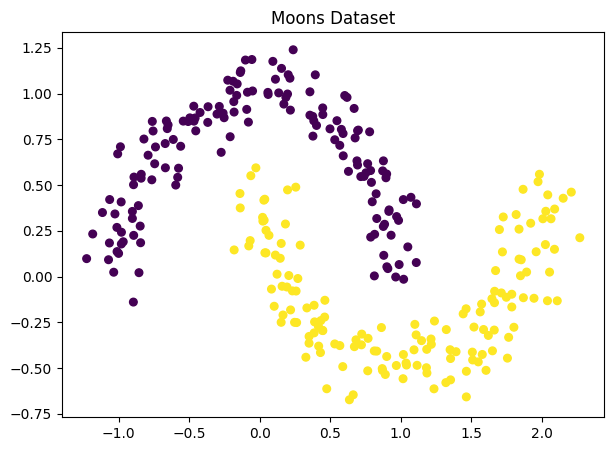

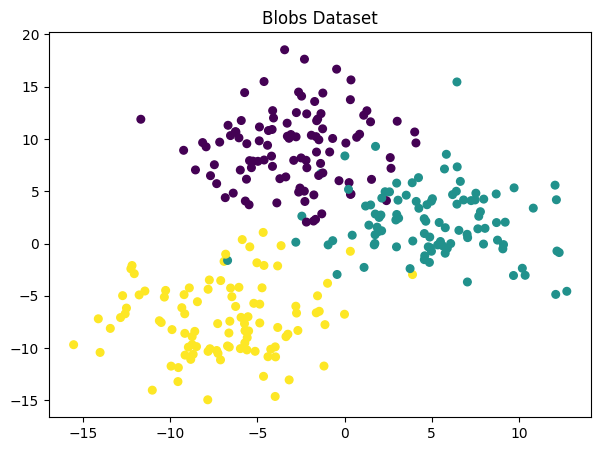

In [ ]:
#TODO
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_blobs
import math

X_moons, y_moons = make_moons(n_samples=300, noise=0.1, random_state=42)
plt.figure(figsize=(7, 5))
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, cmap='viridis', s=30)
plt.title("Moons Dataset")
plt.show()

X_blobs, y_blobs = make_blobs(n_samples=300, centers=3, cluster_std=3.5, random_state=42)
plt.figure(figsize=(7, 5))
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_blobs, cmap='viridis', s=30)
plt.title("Blobs Dataset")
plt.show()


## K-Means Clustering From Scratch
- **Steps**:  
  1. Randomly initialize $ k $ centroids.  
  2. Assign each data point to the nearest centroid.  
  3. Update centroids as the mean of all points assigned to them.  
  4. Repeat steps 2 and 3 until centroids converge or a maximum number of iterations is reached.

Please implement the K-means method as dicscussed above. You are not allowed to use skelarn methods.

In [87]:
def initialize_centroids(X, k):
    np.random.seed(42)
    random_indices = np.random.permutation(X.shape[0])[:k]
    return X[random_indices]

def assign_clusters(X, centroids):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(X, labels, k):
    new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
    return new_centroids

def k_means(X, k, max_iters=100, tol=1e-4):
    centroids = initialize_centroids(X, k)
    for i in range(max_iters):
        labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, k)
        if np.all(np.linalg.norm(new_centroids - centroids, axis=1) < tol):
            break

        centroids = new_centroids

    return centroids, labels

def silhouette_score(X, labels):
    n = X.shape[0]
    unique_labels = np.unique(labels)
    silhouette_scores = np.zeros(n)

    for i in range(n):
        same_cluster = X[labels == labels[i]]
        a_i = np.mean(np.linalg.norm(same_cluster - X[i], axis=1)) if len(same_cluster) > 1 else 0
        b_i = np.inf
        for other_label in unique_labels:
            if other_label != labels[i]:
                other_cluster = X[labels == other_label]
                b_i = min(b_i, np.mean(np.linalg.norm(other_cluster - X[i], axis=1)))
        silhouette_scores[i] = (b_i - a_i) / max(a_i, b_i)
    result = np.mean(silhouette_scores)
    if math.isnan(result):
      return -1
    return result

Visualize your clustering results on both moons and blobs dataset:

Silhouette Score for Moons Dataset: 0.4829472946155847


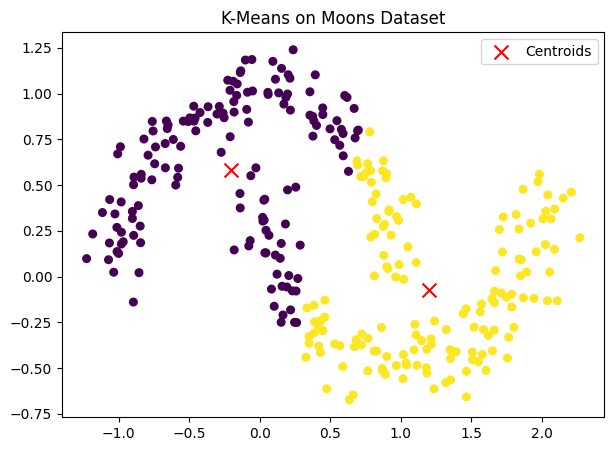

Silhouette Score for Blobs Dataset: 0.5300307592331405


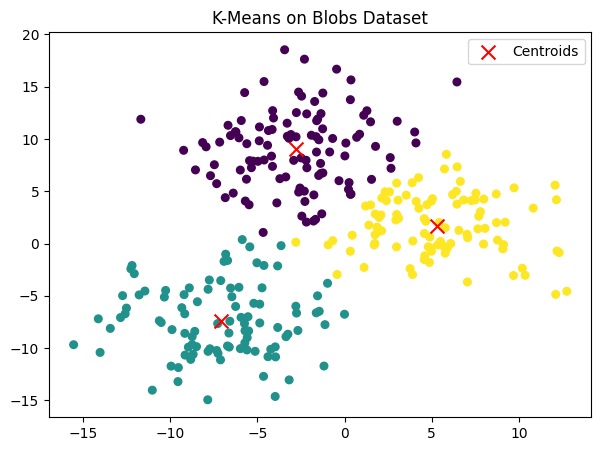

In [ ]:
#TODO
k_moons = 2
centroids_moons, labels_moons = k_means(X_moons, k_moons)
silhouette_moons = silhouette_score(X_moons, labels_moons)
print(f"Silhouette Score for Moons Dataset: {silhouette_moons}")

plt.figure(figsize=(7, 5))
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=labels_moons, cmap='viridis', s=30)
plt.scatter(centroids_moons[:, 0], centroids_moons[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.title(f"K-Means on Moons Dataset")
plt.legend()
plt.show()

k_blobs = 3
centroids_blobs, labels_blobs = k_means(X_blobs, k_blobs)
silhouette_blobs = silhouette_score(X_blobs, labels_blobs)
print(f"Silhouette Score for Blobs Dataset: {silhouette_blobs}")

plt.figure(figsize=(7, 5))
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=labels_blobs, cmap='viridis', s=30)
plt.scatter(centroids_blobs[:, 0], centroids_blobs[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.title(f"K-Means on Blobs Dataset")
plt.legend()
plt.show()

**Why does the K-means failed to cluster the crescent-shaped clusters even though number of clusters is knwon before-hand?**

**Ans:**
K-Means fails to cluster crescent-shaped clusters because it assumes clusters are spherical and separated by straight boundaries. The crescent-shaped clusters in the Moons dataset are non-linear and overlap in a way that K-Means can't handle, even if the number of clusters is known.

**What do you think a proper clustering method should implement to overcome problem of non-spherical cluster handling?**

**Ans:**

A proper clustering method should:

1) Handle non-linear boundaries: Use algorithms like DBSCAN or Spectral Clustering, which can find clusters of arbitrary shapes.

2) Focus on density: Identify dense regions of points instead of assuming spherical clusters.

3) Use pairwise similarities: Base clustering on how similar points are, instead of just distance to a centroid.

### DBSCAN (Density-Based Spatial Clustering of Applications with Noise)  
- **Objective**: Group data points into dense regions and identify noise points (outliers).  
- **Parameters**:  
  - $ \varepsilon $ : Maximum distance for two points to be considered neighbors.  
  - $ \text{min_samples} $: Minimum number of points required to form a dense region.  
- **Steps**:  
  1. Identify core points (points with at least `min_samples` neighbors within distance $ \varepsilon $).  
  2. Expand clusters from core points by connecting them to their neighbors.  
  3. Mark points that are not part of any cluster as noise.  


Please implement the DBSCAN method as dicscussed above. You are not allowed to use skelarn methods.

In [ ]:
def dbscan(X, eps, min_samples):
    n = X.shape[0]
    labels = np.full(n, -1)
    visited = np.zeros(n, dtype=bool)
    cluster_id = 0

    def region_query(point_idx):
        neighbors = []
        for i in range(n):
            if np.linalg.norm(X[point_idx] - X[i]) <= eps:
                neighbors.append(i)
        return neighbors

    def expand_cluster(point_idx, neighbors):
        nonlocal cluster_id
        labels[point_idx] = cluster_id
        i = 0
        while i < len(neighbors):
            neighbor_idx = neighbors[i]
            if not visited[neighbor_idx]:
                visited[neighbor_idx] = True
                new_neighbors = region_query(neighbor_idx)
                if len(new_neighbors) >= min_samples:
                    neighbors += new_neighbors
            if labels[neighbor_idx] == -1:
                labels[neighbor_idx] = cluster_id
            i += 1

    for point_idx in range(n):
        if visited[point_idx]:
            continue
        visited[point_idx] = True
        neighbors = region_query(point_idx)
        if len(neighbors) >= min_samples:
            cluster_id += 1
            expand_cluster(point_idx, neighbors)

    return labels


Silhouette Score for Moons Dataset: 0.3281196094497566


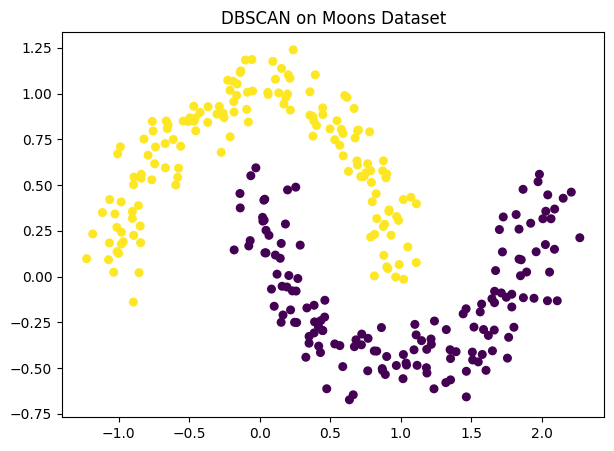

<ipython-input-3-8db1f0eed128>:39: RuntimeWarning: invalid value encountered in scalar divide
  silhouette_scores[i] = (b_i - a_i) / max(a_i, b_i)


Silhouette Score for Blobs Dataset: -1


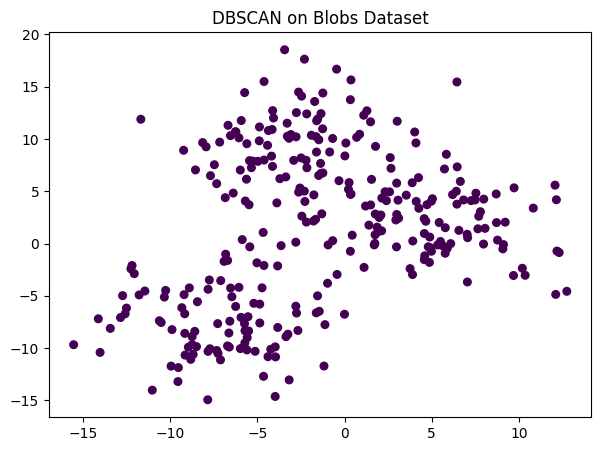

In [ ]:
#TODO
eps_moons = 0.2
min_samples_moons = 5
labels_moons = dbscan(X_moons, eps=eps_moons, min_samples=min_samples_moons)
silhouette_moons = silhouette_score(X_moons, labels_moons)
print(f"Silhouette Score for Moons Dataset: {silhouette_moons}")

plt.figure(figsize=(7, 5))
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=labels_moons, cmap='viridis', s=30)
plt.title("DBSCAN on Moons Dataset")
plt.show()

eps_blobs = 0.2
min_samples_blobs = 5
labels_blobs = dbscan(X_blobs, eps=eps_blobs, min_samples=min_samples_blobs)
silhouette_blobs = silhouette_score(X_blobs, labels_blobs)
print(f"Silhouette Score for Blobs Dataset: {silhouette_blobs}")

plt.figure(figsize=(7, 5))
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=labels_blobs, cmap='viridis', s=30)
plt.title("DBSCAN on Blobs Dataset")
plt.show()

**Why DBSCAN failed to cluster datapoints coorectly?**

**Ans:**

DBSCAN failed to cluster the points correctly because the parameters (eps and min_samples) are not tuned properly:

For Blobs Dataset the clusters are too dispersed, and DBSCAN couldn't identify dense regions effectively due to unsuitable eps and min_samples.

### Elbow Method for K-means

Up to this point, we used cheating to find the correct number of clusters. But what if we don't know the number of clusters before-hand? **Does increasing number of clusters help us? (Think of this question as a tradeoff between Inertia and generalization of clusters)**

**Ans:**

Increasing the number of clusters reduces inertia, but it doesn't always help because it can lead to overfitting, where clusters stop generalizing well to the data. Instead of blindly increasing clusters, methods like the Elbow Method can help find the optimal balance between inertia and generalization.

**Elbow method** is a generally knwon way of finding best K for clustering methods. Implement elbow method and visualize the change of **Inertia** by the number of clusters:

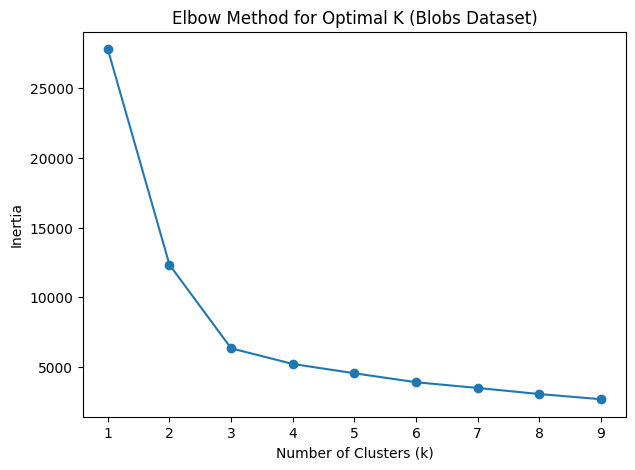

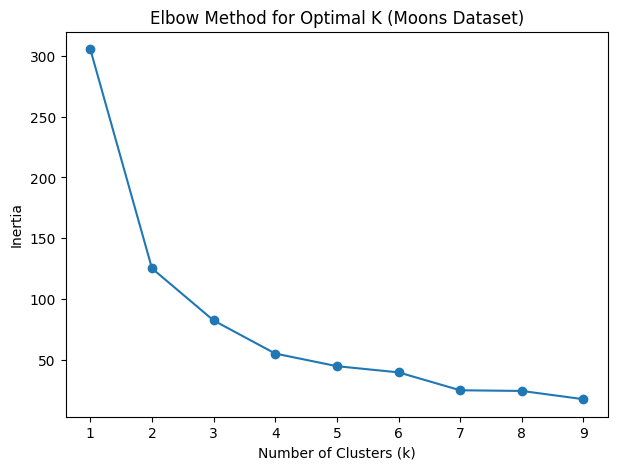

In [ ]:
#TODO
def calculate_inertia(X, k, max_iters=100, tol=1e-4):
    centroids, labels = k_means(X, k, max_iters=max_iters, tol=tol)
    inertia = np.sum([np.linalg.norm(X[labels == i] - centroids[i]) ** 2 for i in range(k)])
    return inertia

k_values = range(1, 10)
inertia_values_moons = [calculate_inertia(X_moons, k) for k in k_values]
inertia_values_blobs = [calculate_inertia(X_blobs, k) for k in k_values]

plt.figure(figsize=(7, 5))
plt.plot(k_values, inertia_values_blobs, marker='o', linestyle='-')
plt.title("Elbow Method for Optimal K (Blobs Dataset)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()

plt.figure(figsize=(7, 5))
plt.plot(k_values, inertia_values_moons, marker='o', linestyle='-')
plt.title("Elbow Method for Optimal K (Moons Dataset)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()

**Analyze the plots above. If you were asked to choose number of clusters for each dataset, what number would you suggest?**

**Ans:**

Blobs Dataset: The "elbow" is most noticeable at k=3, indicating that 3 clusters would be the optimal choice. This aligns with the dataset's structure of three dispersed clusters.

Moons Dataset: The "elbow" is clear at k=2, which corresponds to the two crescent-shaped clusters in the dataset.

# Soft Clustering (30 points)

In this section, we transition from hard clustering to **soft clustering**, where each data point can belong to multiple clusters with varying probabilities. This way, we are able to model overlapping clusters effectively.

## Expectation-Maximization (EM) Algorithm
EM is an iterative method for finding maximum likelihood estimates of parameters in probabilistic models, particularly when the data is incomplete. In clustering, EM alternates between:
- **E-step**: Assign probabilities of each data point belonging to each cluster.
- **M-step**: Update cluster parameters to maximize the likelihood of the data.



<p align="center">
  <img src="https://akireeva.com/assets/GMM/density_estimation.gif"/>
</p>

**Can you think of a real-world application where soft clustering might be preferred over hard clustering? Why?**

**Ans:**
Customer Segmentation in Marketing

Soft clustering is preferred because customers often belong to multiple segments. It models overlapping behaviors and provides probabilities, enabling better personalization and decision-making.
______

**How is EM algorithm different from previousely discussed clustering algorithms?**

**Ans:**

The EM algorithm differs by using soft clustering (assigning probabilities to clusters) and a probabilistic model to handle overlapping clusters, while K-Means and DBSCAN use hard clustering with strict assignments.
______

**Assuming that EM gives us best fitting probability density clustering estimations, how can one use it to change to convert the problem of soft clustering to hard clustering?**

**Ans:**

To convert soft clustering from EM to hard clustering, we can assign each data point to the cluster with the highest probability:

1) we can perform EM to get probabilities for each data point belonging to each cluster.

2) For each data point, we select the cluster with the maximum probability as its hard assignment.

### Gaussian Mixture Models (GMM)
GMM is a soft clustering method where clusters are modeled as multivariate Gaussian distributions. Each cluster is defined by:
- A mean vector (center of the Gaussian).
- A covariance matrix (shape and orientation of the Gaussian).
- A mixing coefficient (proportion of the data belonging to the cluster).


<p align="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/6/69/EM_Clustering_of_Old_Faithful_data.gif" />
</p>

### Implementation of GMM





#### 1. E-Step
In the E-Step, we calculate the **responsibilities** for each data point. The responsibility $ \gamma_{ik} $ represents the probability that point $ x_i $ belongs to cluster $ k $, given the current parameters of the Gaussian components.

Mathematically:
$$
\gamma_{ik} = \frac{\pi_k \cdot \mathcal{N}(x_i | \mu_k, \Sigma_k)}{\sum_{j=1}^K \pi_j \cdot \mathcal{N}(x_i | \mu_j, \Sigma_j)}
$$

Where:
- $ \mathcal{N}(x_i | \mu_k, \Sigma_k) $ is the Gaussian probability density function:
  $$
  \mathcal{N}(x_i | \mu_k, \Sigma_k) = \frac{1}{(2\pi)^{d/2} |\Sigma_k|^{1/2}} \exp\left(-\frac{1}{2}(x_i - \mu_k)^T \Sigma_k^{-1} (x_i - \mu_k)\right)
  $$
- $ \pi_k $ is the mixing coefficient for cluster $ k $, satisfying $ \sum_{k=1}^K \pi_k = 1 $.

#### 2. M-Step
In the M-Step, we update the parameters of the Gaussian components (means $ \mu_k $, covariances $ \Sigma_k $, and mixing coefficients $ \pi_k $) to maximize the likelihood of the data under the current responsibilities.

1. **Update the Mixing Coefficients**:
   $$
   \pi_k = \frac{\sum_{i=1}^n \gamma_{ik}}{n}
   $$
   This ensures $ \sum_{k=1}^K \pi_k = 1 $.

2. **Update the Means**:
   $$
   \mu_k = \frac{\sum_{i=1}^n \gamma_{ik} x_i}{\sum_{i=1}^n \gamma_{ik}}
   $$

3. **Update the Covariance Matrices**:
   $$
   \Sigma_k = \frac{\sum_{i=1}^n \gamma_{ik} (x_i - \mu_k)(x_i - \mu_k)^T}{\sum_{i=1}^n \gamma_{ik}}
   $$

#### Iteration Process
1. Initialize the parameters $ \pi_k $, $ \mu_k $, and $ \Sigma_k $.
2. Alternate between the **E-Step** and **M-Step** until the log-likelihood converges or a maximum number of iterations is reached.

In this section, you will implement a GMM and apply it to previously defined moons and blobs dataset. Please note that implementing separate and logically correct **E step** and **M step** is required.

Your are not allowed to use any ready GMM API for this section.

In [ ]:
#TODO
from scipy.stats import multivariate_normal

def initialize_gmm(X, K):
    n, d = X.shape
    np.random.seed(42)

    pi_k = np.full(K, 1/K)

    mu_k = X[np.random.choice(n, K, replace=False)]

    sigma_k = np.array([np.eye(d) for _ in range(K)])

    return pi_k, mu_k, sigma_k

def e_step(X, pi_k, mu_k, sigma_k, K):
    n, d = X.shape
    gamma = np.zeros((n, K))

    for k in range(K):
        gamma[:, k] = pi_k[k] * multivariate_normal(mean=mu_k[k], cov=sigma_k[k]).pdf(X)

    gamma /= gamma.sum(axis=1, keepdims=True)

    return gamma

def m_step(X, gamma, K):
    """
    M-Step: Update parameters πk, μk, and Σk.
    """
    n, d = X.shape
    N_k = gamma.sum(axis=0)

    pi_k = N_k / n

    mu_k = np.dot(gamma.T, X) / N_k[:, np.newaxis]

    sigma_k = np.zeros((K, d, d))
    for k in range(K):
        X_centered = X - mu_k[k]
        sigma_k[k] = np.dot((gamma[:, k][:, np.newaxis] * X_centered).T, X_centered) / N_k[k]

    return pi_k, mu_k, sigma_k

def log_likelihood(X, pi_k, mu_k, sigma_k, K):
    n, d = X.shape
    log_likelihood = 0
    for k in range(K):
        log_likelihood += pi_k[k] * multivariate_normal(mean=mu_k[k], cov=sigma_k[k]).pdf(X)
    return np.sum(np.log(log_likelihood))

def gmm(X, K, max_iters=100, tol=1e-4):
    pi_k, mu_k, sigma_k = initialize_gmm(X, K)
    log_likelihoods = []

    for iteration in range(max_iters):
        gamma = e_step(X, pi_k, mu_k, sigma_k, K)

        pi_k, mu_k, sigma_k = m_step(X, gamma, K)

        ll = log_likelihood(X, pi_k, mu_k, sigma_k, K)
        log_likelihoods.append(ll)

        if iteration > 0 and abs(log_likelihoods[-1] - log_likelihoods[-2]) < tol:
            break

    return pi_k, mu_k, sigma_k, gamma, log_likelihoods

### Visualizing GMM

In this section, visualize the results of your fitted GMM.

#### What to Plot:
1. **Data Points with Blended Colors**:
   - Each point is colored based on its **responsibilities** $ \gamma_{ik} $, showing how likely it is to belong to each cluster.
   - This demonstrates the "soft" nature of clustering, where points can belong to multiple clusters with different probabilities.

2. **Gaussian Contours**:
   - Use the means ($ \mu_k $) and covariances $( \Sigma_k $) of the fitted Gaussian components to plot the contours of the probability density function for each cluster.

3. Compare this soft clustering visualization with a hard clustering visualization to understand the differences.


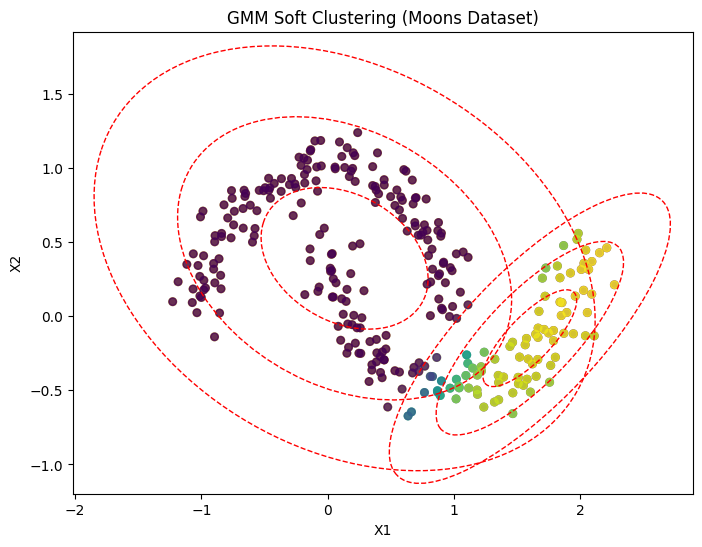

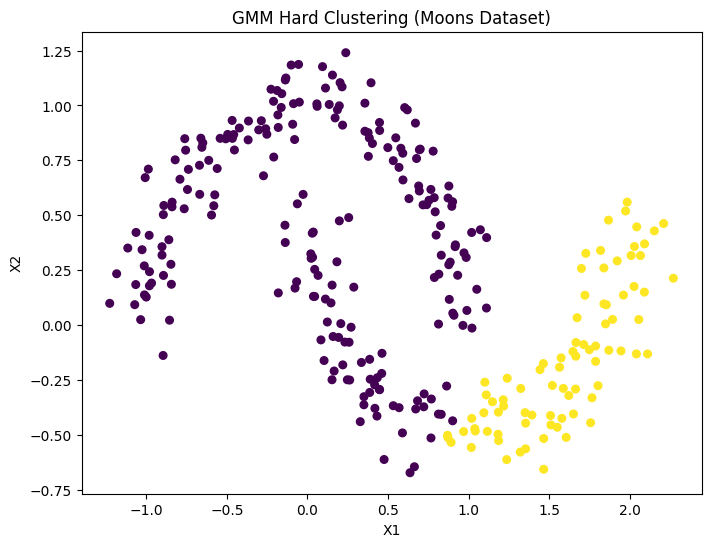

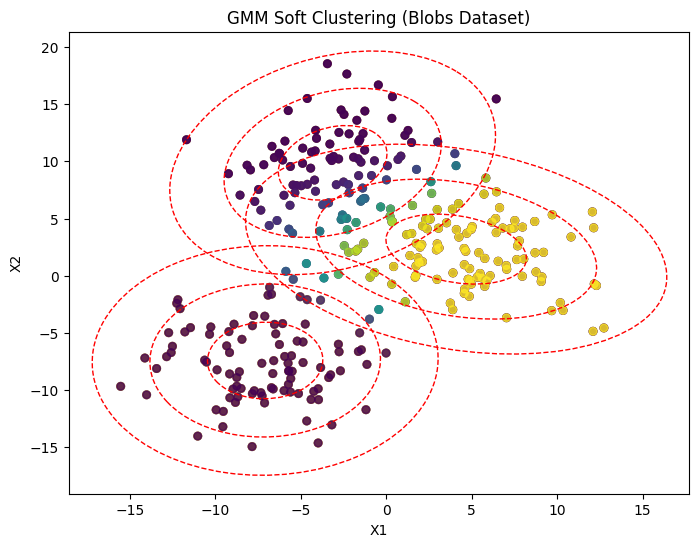

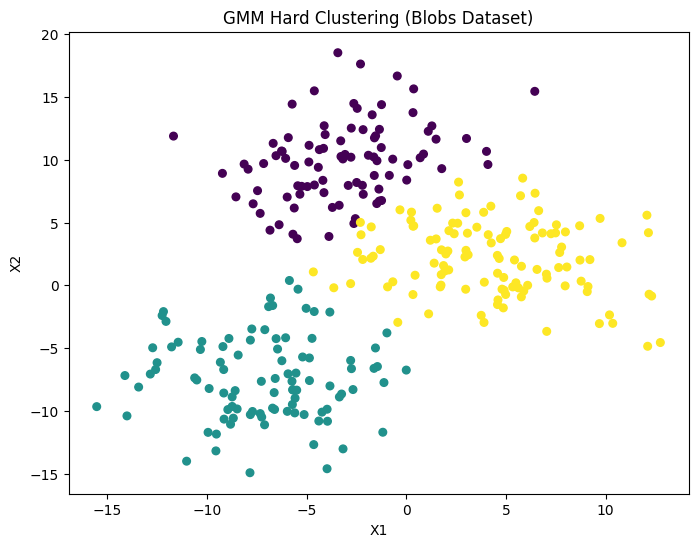

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Ellipse
from sklearn.datasets import make_moons, make_blobs

def plot_gmm_soft(X, gamma, mu_k, sigma_k, title):
    """
    Visualize GMM with blended colors and multiple Gaussian contours.
    """
    n, K = gamma.shape
    plt.figure(figsize=(8, 6))

    for k in range(K):
        plt.scatter(X[:, 0], X[:, 1], c=gamma[:, k], cmap='viridis', alpha=0.8, s=30)

    for k in range(K):
        plot_gaussian_contour(mu_k[k], sigma_k[k], n_std_list=[1, 2, 3])

    plt.title(title)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.show()

def plot_gaussian_contour(mean, cov, n_std_list=None):
    """
    Plot multiple Gaussian contour ellipses for different confidence intervals.
    """
    eigenvalues, eigenvectors = np.linalg.eigh(cov)
    angle = np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0])
    angle = np.degrees(angle)

    for n_std in n_std_list:
        width, height = 2 * n_std * np.sqrt(eigenvalues)
        ellipse = Ellipse(
            xy=mean, width=width, height=height, angle=angle,
            edgecolor='red', facecolor='none', linewidth=1, linestyle='--'
        )
        plt.gca().add_patch(ellipse)

def plot_gmm_hard(X, gamma, title):
    """
    Visualize hard clustering (assign points to the most likely cluster).
    """
    labels = np.argmax(gamma, axis=1)
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30)
    plt.title(title)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.show()

K_moons = 2
pi_k_moons, mu_k_moons, sigma_k_moons, gamma_moons, ll_moons = gmm(X_moons, K_moons)

K_blobs = 3
pi_k_blobs, mu_k_blobs, sigma_k_blobs, gamma_blobs, ll_blobs = gmm(X_blobs, K_blobs)

plot_gmm_soft(X_moons, gamma_moons, mu_k_moons, sigma_k_moons, "GMM Soft Clustering (Moons Dataset)")
plot_gmm_hard(X_moons, gamma_moons, "GMM Hard Clustering (Moons Dataset)")

plot_gmm_soft(X_blobs, gamma_blobs, mu_k_blobs, sigma_k_blobs, "GMM Soft Clustering (Blobs Dataset)")
plot_gmm_hard(X_blobs, gamma_blobs, "GMM Hard Clustering (Blobs Dataset)")



**What are the potential challenges or limitations of using GMM on real-world data? When would you prefer using GMM over K-Means or DBSCAN in a real-world application?**  

**Ans:**

Challenges of GMM:

1) Assumes clusters are Gaussian, which may not fit arbitrary shapes.

2) Sensitive to initialization, leading to local optima.

3) Computationally expensive for large datasets.

When to Prefer GMM:

*   When clusters overlap or have     different shapes/sizes.
*   When soft clustering (probabilistic membership) is required.
*   When data follows Gaussian-like distributions.

---
**Suppose your dataset includes categorical variables in addition to continuous ones. Can GMM still be used? Why or why not?**  

**Ans:**

No, GMM cannot directly handle categorical variables because it models data as Gaussian distributions, which require continuous numerical variables. Categorical data needs to be encoded or a different algorithm like Mixed Membership Models should be used.


# Toward Real Datasets (40 points)

In this section, you will implement clustering on a real customer dataset. The point of this clustering is to identify cluster of customers with Low/High value for the seller. The dataset we'll be using is [Customer Personality Analysis](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/data).

In [1]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/y
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

!kaggle datasets download imakash3011/customer-personality-analysis
!unzip customer-personality-analysis.zip

mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.11/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/
Dataset URL: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis
License(s): CC0-1.0
  0% 0.00/62.0k [00:00<?, ?B/s]
100% 62.0k/62.0k [00:00<00:00, 65.2MB/s]
Archive:  customer-personality-analysis.zip
  inflating: marketing_campaign.csv  


## Exploratory data analysis (EDA)

Before starting to cluster the data, you may explore the data to understand features, their respective distributions and their possible contribution to the data. Please note that no usual way of exploring data exists so you may go as creative as you want for this section. You are also allowed to change the features, reduce them or create new features to reach better results. The following cells are only a simple demonstration of what you are capable in terms of EDA:

In [23]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

### Loading dataset and EDA

In [69]:
#TODO
df = pd.read_csv("marketing_campaign.csv", delimiter='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [51]:
#TODO
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [52]:
missing_values = df.isnull().sum()
missing_values

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


Do not forget to drop the target columns as well as unnecessary column ID

In [70]:
columns_to_drop = ['ID', 'Z_CostContact', 'Z_Revenue']
df = df.drop(columns=columns_to_drop, axis=1)
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,3,6,5,0,0,0,0,0,0,0


### Feature engineering

Since some features (such as Marital status or education) have multiple values with the same meaning, you can reduce these values to some simple values:

In [71]:
marital_status_mapping = {
    'Married': 'Married',
    'Together': 'Married',
    'Divorced': 'Single',
    'Widow': 'Single',
    'Single': 'Single',
    'Alone': 'Single',
}
df['Marital_Status'] = df['Marital_Status'].map(marital_status_mapping)

In [72]:
df['Education'] = df['Education'].replace({
    'Basic': 'Undergraduate',
    '2n Cycle': 'Graduate',
    'Graduation': 'Graduate',
    'Master': 'Postgraduate',
    'PhD': 'Postgraduate'
})

In [73]:
df['Kids'] = df['Kidhome'] + df['Teenhome']

spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['Expenses'] = df[spending_columns].sum(axis=1)

purchase_columns = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
df['TotalNumPurchases'] = df[purchase_columns].sum(axis=1)

campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
df['TotalAcceptedCmp'] = df[campaign_columns].sum(axis=1)

print(df[['Kids', 'Expenses', 'TotalNumPurchases', 'TotalAcceptedCmp']].head())

   Kids  Expenses  TotalNumPurchases  TotalAcceptedCmp
0     0      1617                 25                 0
1     2        27                  6                 0
2     0       776                 21                 0
3     1        53                  8                 0
4     1       422                 19                 0


In [74]:
print(df['Income'].isnull().sum())
print(df['Income'].nunique())
df['Income'] = df['Income'].fillna(df['Income'].mean())

columns_to_keep = [
    'Income',
    'Kids',
    'Recency',
    'Expenses',
    'TotalNumPurchases',
    'TotalAcceptedCmp',
    'Complain',
    'Response',
    'Education',
    'Marital_Status'
]

df_cleaned = df[columns_to_keep]

df_cleaned.head()

24
1974


,Income,Kids,Recency,Expenses,TotalNumPurchases,TotalAcceptedCmp,Complain,Response,Education,Marital_Status
0,58138.0,0,58,1617,25,0,0,1,Graduate,Single
1,46344.0,2,38,27,6,0,0,0,Graduate,Single
2,71613.0,0,26,776,21,0,0,0,Graduate,Married
3,26646.0,1,26,53,8,0,0,0,Graduate,Married
4,58293.0,1,94,422,19,0,0,0,Postgraduate,Married


You can detect outliers and remove them for further use of dataset:

In [75]:
from scipy.stats import zscore

numerical_columns = ['Income', 'Recency', 'Expenses', 'TotalNumPurchases']

z_scores = df_cleaned[numerical_columns].apply(zscore)

threshold = 3

mask = (z_scores.abs() < threshold).all(axis=1)

df_cleaned = df_cleaned[mask]

print("Descriptive Statistics for Z-Scores after Outliers Removal")
df_cleaned.describe()

Descriptive Statistics for Z-Scores after Outliers Removal


,Income,Kids,Recency,Expenses,TotalNumPurchases,TotalAcceptedCmp,Complain,Response
count,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000
mean,51585.365857,0.953258,49.101124,600.619775,14.817978,0.296180,0.009438,0.148764
std,20547.911414,0.751240,28.976394,595.069367,7.580897,0.675169,0.096713,0.355936
min,1730.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,35416.000000,0.000000,24.000000,69.000000,8.000000,0.000000,0.000000,0.000000
50%,51529.000000,1.000000,49.000000,395.000000,15.000000,0.000000,0.000000,0.000000
75%,67911.000000,1.000000,74.000000,1038.000000,21.000000,0.000000,0.000000,0.000000
max,113734.000000,3.000000,99.000000,2352.000000,35.000000,4.000000,1.000000,1.000000


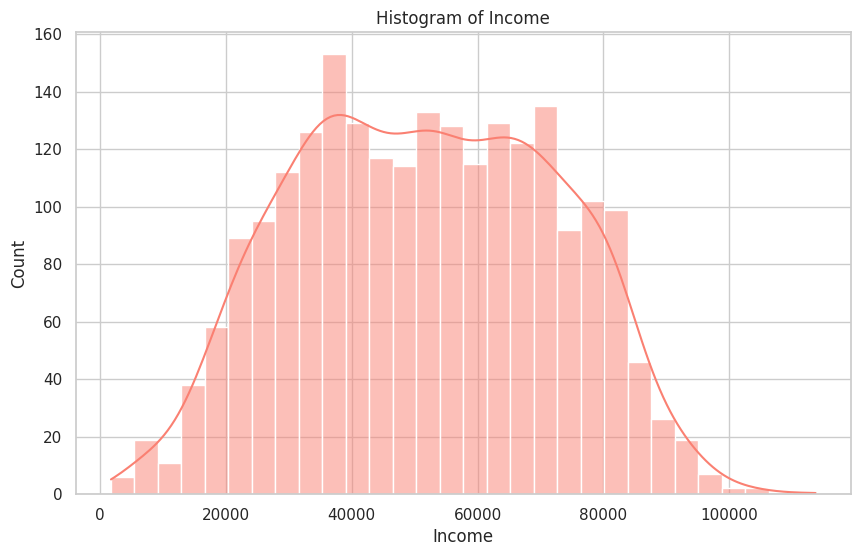

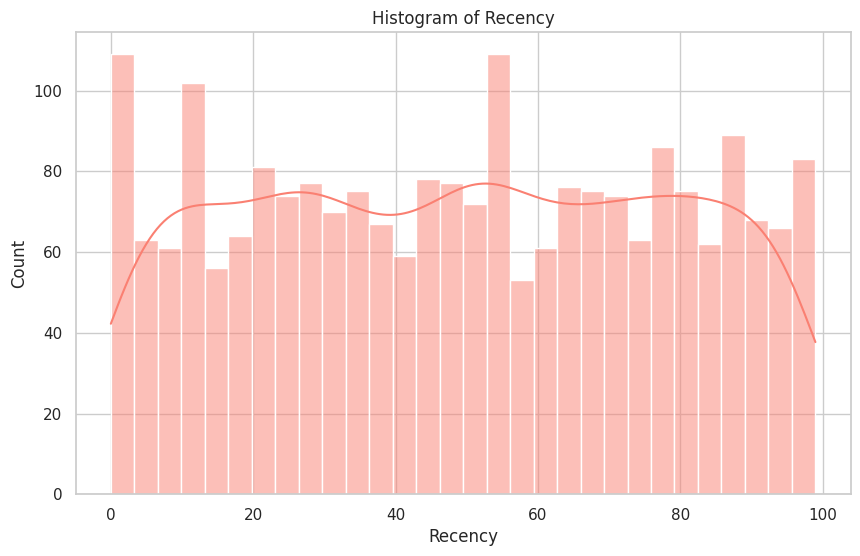

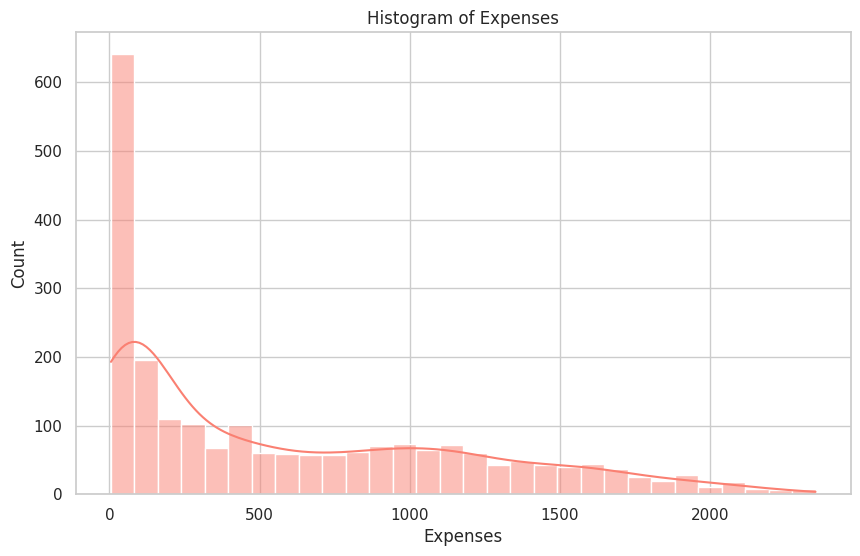

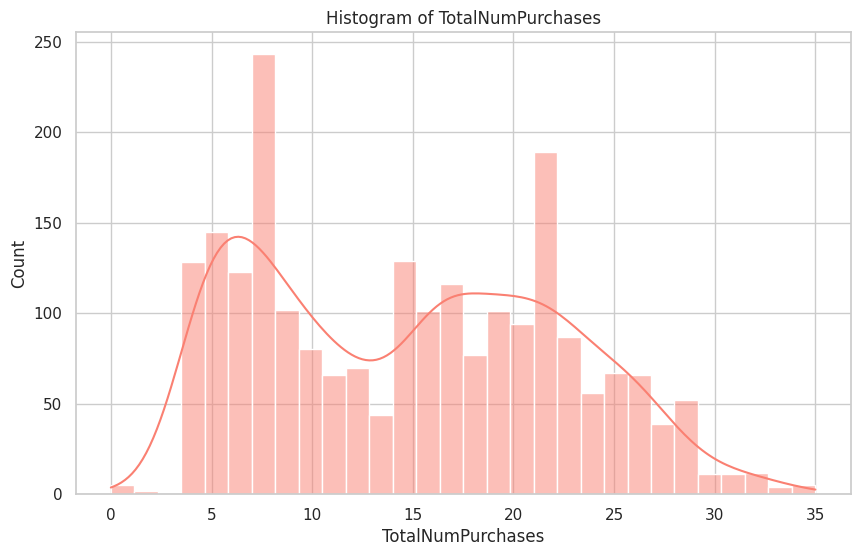

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

columns_to_plot = {
    'Income': 'Histogram of Income',
    'Recency': 'Histogram of Recency',
    'Expenses': 'Histogram of Expenses',
    'TotalNumPurchases': 'Histogram of TotalNumPurchases'
}

for col, title in columns_to_plot.items():
    plt.figure(figsize=(10, 6))
    sns.histplot(df_cleaned[col], kde=True, bins=30, color='salmon')
    plt.title(title)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


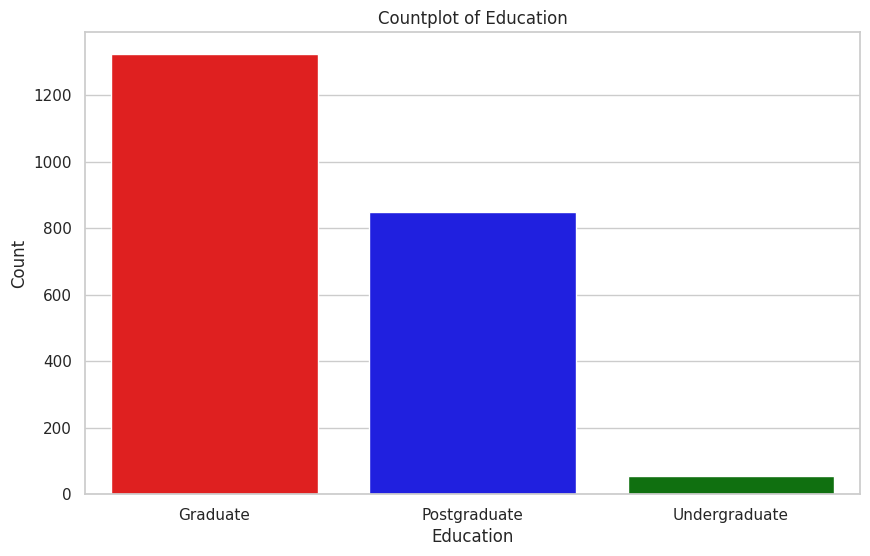

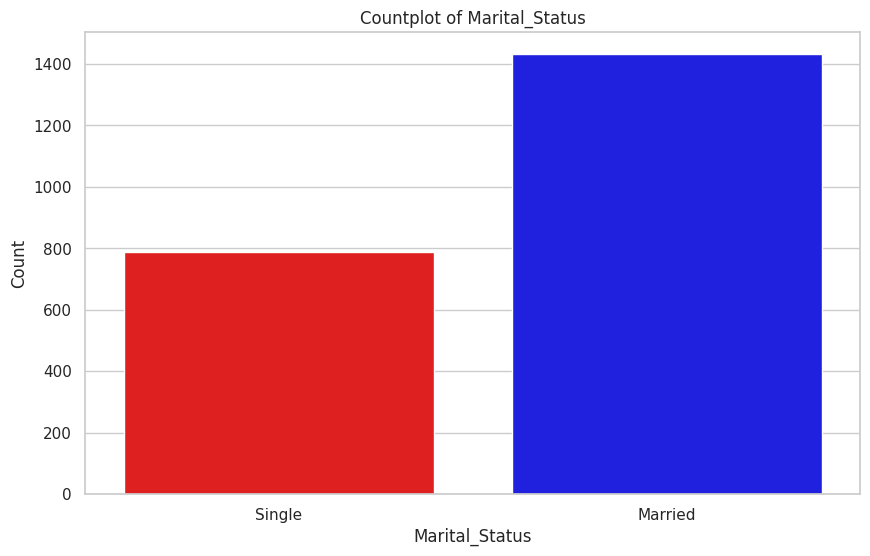

In [77]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x='Education', hue='Education', palette=['red', 'blue', 'green'], dodge=False)
plt.title("Countplot of Education")
plt.xlabel("Education")
plt.ylabel("Count")
plt.legend([], [], frameon=False)
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x='Marital_Status', hue='Marital_Status', palette=['red', 'blue'], dodge=False)
plt.title("Countplot of Marital_Status")
plt.xlabel("Marital_Status")
plt.ylabel("Count")
plt.legend([], [], frameon=False)
plt.show()

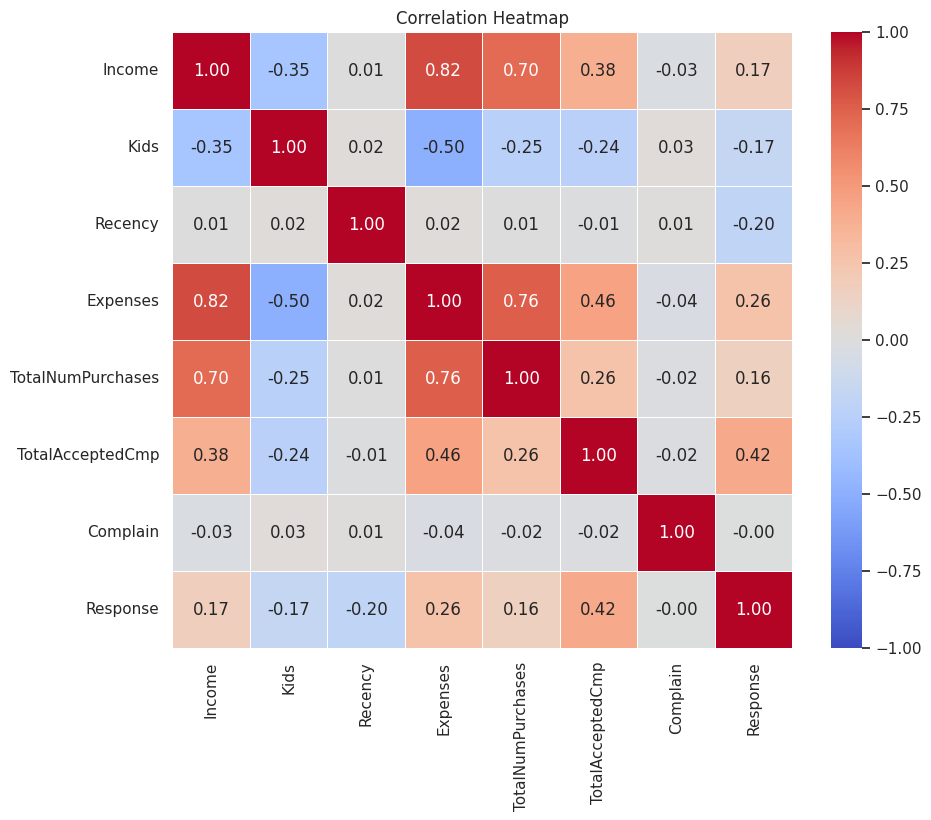

In [80]:
columns_for_correlation = ['Income', 'Kids', 'Recency', 'Expenses', 'TotalNumPurchases',
                            'TotalAcceptedCmp', 'Complain', 'Response']

correlation_matrix = df_cleaned[columns_for_correlation].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


Since dataset contains both numerical and categorical columns, you need to encode categorical values. One-hot encoding will do:

In [84]:
categorical_columns = ['Marital_Status', 'Education']

encoded_df = pd.get_dummies(df_cleaned, columns=categorical_columns, drop_first=True)

print(f"Original dataset shape: {df_cleaned.shape}")
print(f"One-hot encoded dataset shape: {encoded_df.shape}")

encoded_df.head()

Original dataset shape: (2225, 10)
One-hot encoded dataset shape: (2225, 11)


,Income,Kids,Recency,Expenses,TotalNumPurchases,TotalAcceptedCmp,Complain,Response,Marital_Status_Single,Education_Postgraduate,Education_Undergraduate
0,58138.0,0,58,1617,25,0,0,1,True,False,False
1,46344.0,2,38,27,6,0,0,0,True,False,False
2,71613.0,0,26,776,21,0,0,0,False,False,False
3,26646.0,1,26,53,8,0,0,0,False,False,False
4,58293.0,1,94,422,19,0,0,0,False,True,False


### Clustering

Before getting to clustering data, do not forget to scale them:

In [96]:
from sklearn.preprocessing import StandardScaler

numerical_columns = ['Income', 'Recency', 'Expenses', 'TotalNumPurchases', 'Kids', 'TotalAcceptedCmp']
categorical_columns = [col for col in encoded_df.columns if col not in numerical_columns]

scaler = StandardScaler()

df_scaled = encoded_df.copy()
df_scaled[numerical_columns] = scaler.fit_transform(encoded_df[numerical_columns])

print("Scaled Numerical Features:")
print(df_scaled[numerical_columns].head())

print(f"Scaled dataset shape: {df_scaled.shape}")

Scaled Numerical Features:
     Income   Recency  Expenses  TotalNumPurchases      Kids  TotalAcceptedCmp
0  0.318967  0.307177  1.708387           1.343418 -1.269199         -0.438774
1 -0.255138 -0.383195 -0.964171          -1.163445  1.393666         -0.438774
2  0.974899 -0.797419  0.294789           0.815657 -1.269199         -0.438774
3 -1.213991 -0.797419 -0.920469          -0.899565  0.062233         -0.438774
4  0.326512  1.549847 -0.300234           0.551777  0.062233         -0.438774
Scaled dataset shape: (2225, 11)


Since our initial idea was to cluster customers to identify low/high value customers, you can use K-Means with $ k=2 $ :

In [97]:
X = df_scaled[numerical_columns].values

k = 2
centroids, labels = k_means(X, k)

In [108]:
#TODO
df_scaled['Cluster'] = labels
df_scaled.head()

,Income,Kids,Recency,Expenses,TotalNumPurchases,TotalAcceptedCmp,Complain,Response,Marital_Status_Single,Education_Postgraduate,Education_Undergraduate,Cluster
0,0.318967,-1.269199,0.307177,1.708387,1.343418,-0.438774,0,1,True,False,False,0
1,-0.255138,1.393666,-0.383195,-0.964171,-1.163445,-0.438774,0,0,True,False,False,1
2,0.974899,-1.269199,-0.797419,0.294789,0.815657,-0.438774,0,0,False,False,False,0
3,-1.213991,0.062233,-0.797419,-0.920469,-0.899565,-0.438774,0,0,False,False,False,1
4,0.326512,0.062233,1.549847,-0.300234,0.551777,-0.438774,0,0,False,True,False,1


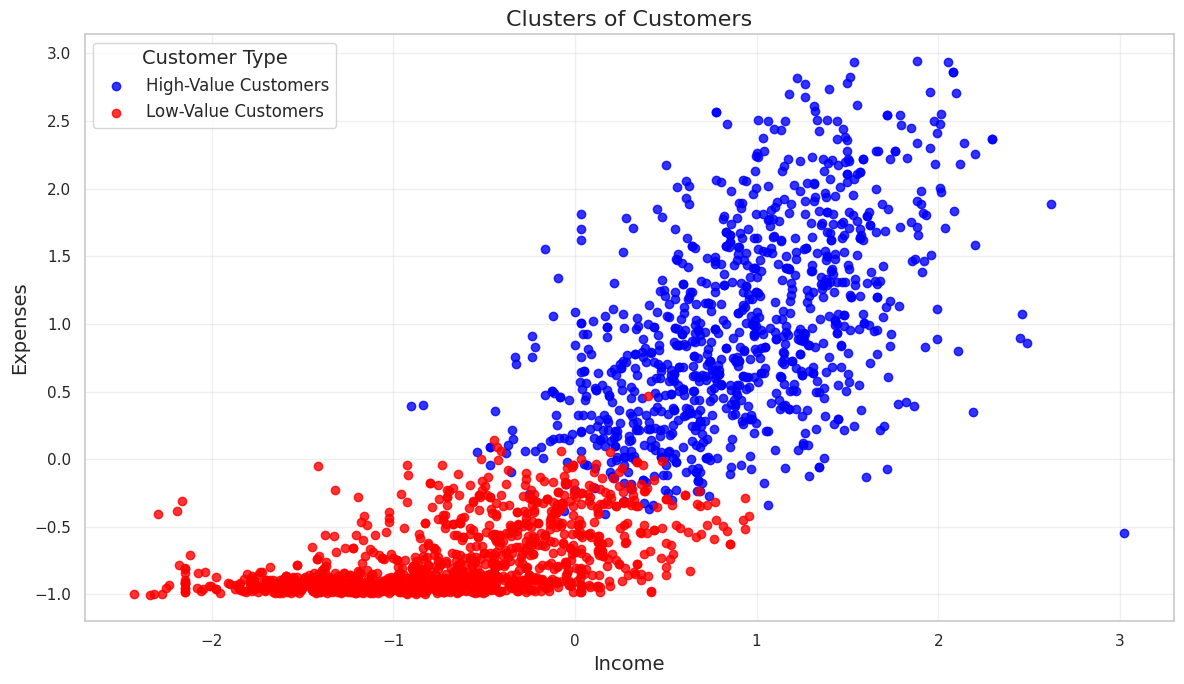

In [109]:
import matplotlib.pyplot as plt

cluster_colors = ['blue', 'red']
cluster_labels = ['High-Value Customers', 'Low-Value Customers']

plt.figure(figsize=(12, 7))
for cluster, color, label in zip(range(2), cluster_colors, cluster_labels):
    plt.scatter(
        df_scaled.loc[df_scaled['Cluster'] == cluster, 'Income'],
        df_scaled.loc[df_scaled['Cluster'] == cluster, 'Expenses'],
        c=color,
        label=label,
        alpha=0.8
    )

plt.xlabel('Income', fontsize=14)
plt.ylabel('Expenses', fontsize=14)
plt.title('Clusters of Customers', fontsize=16)
plt.legend(fontsize=12, title='Customer Type', title_fontsize=14)
plt.grid(alpha=0.3)
plt.tight_layout()

plt.show()

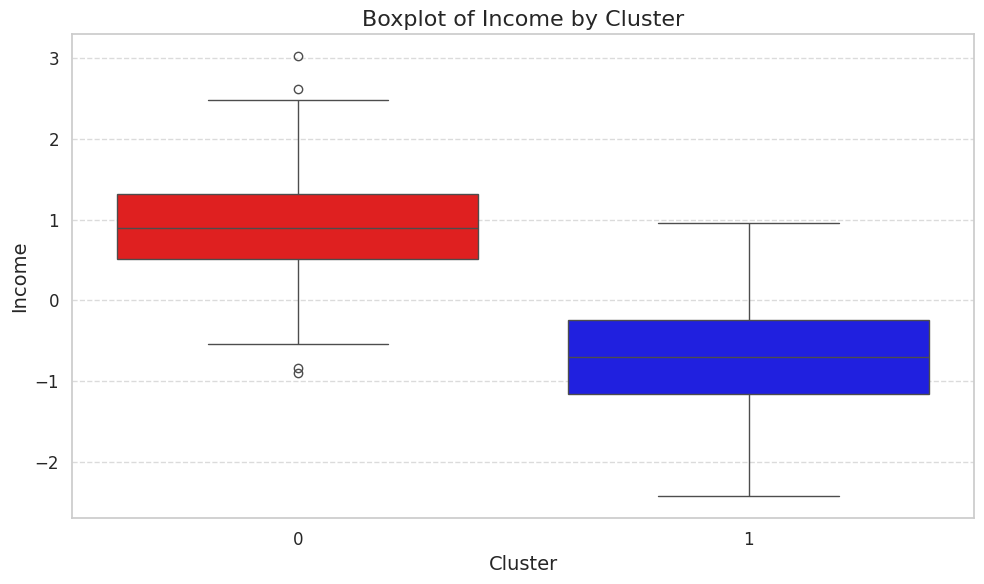

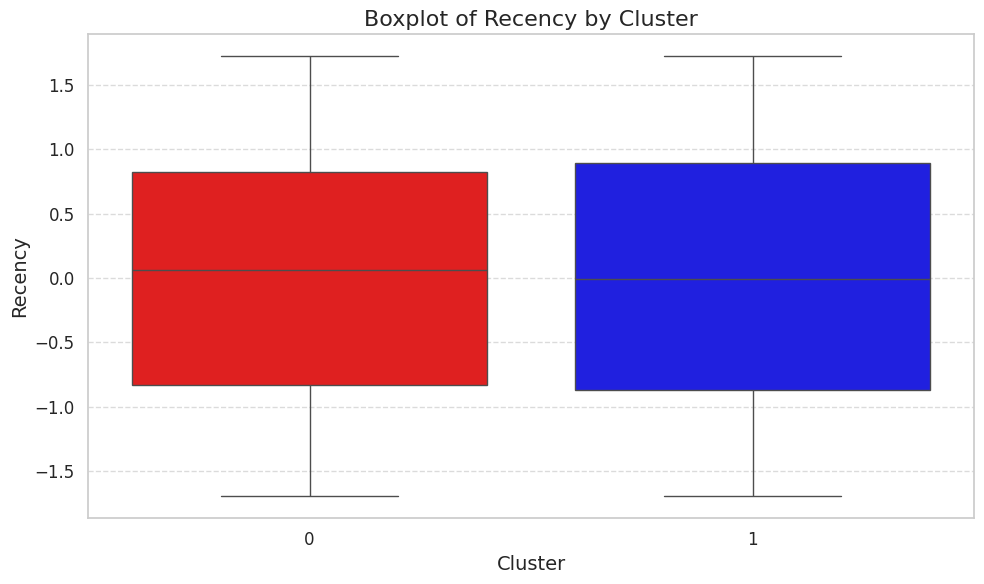

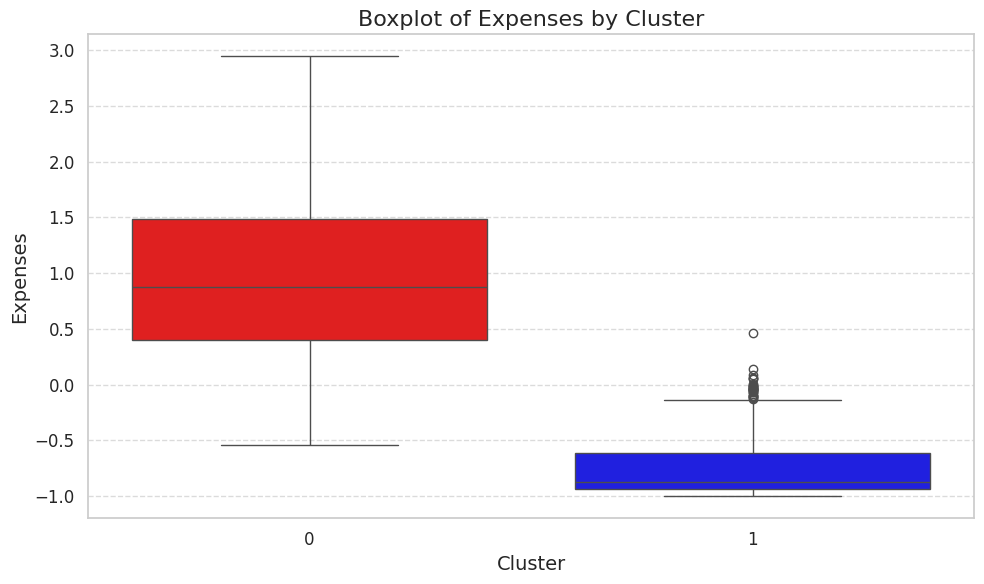

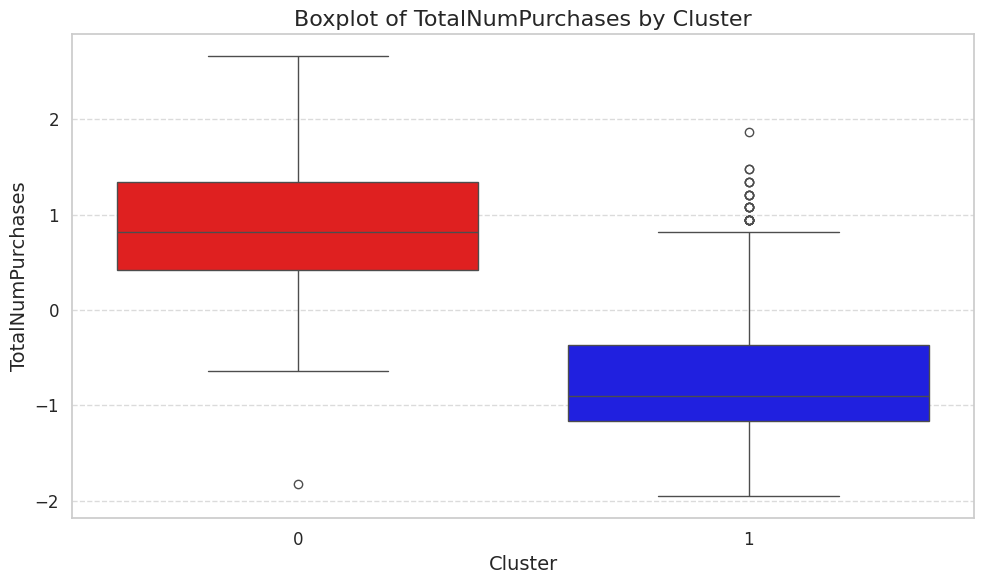

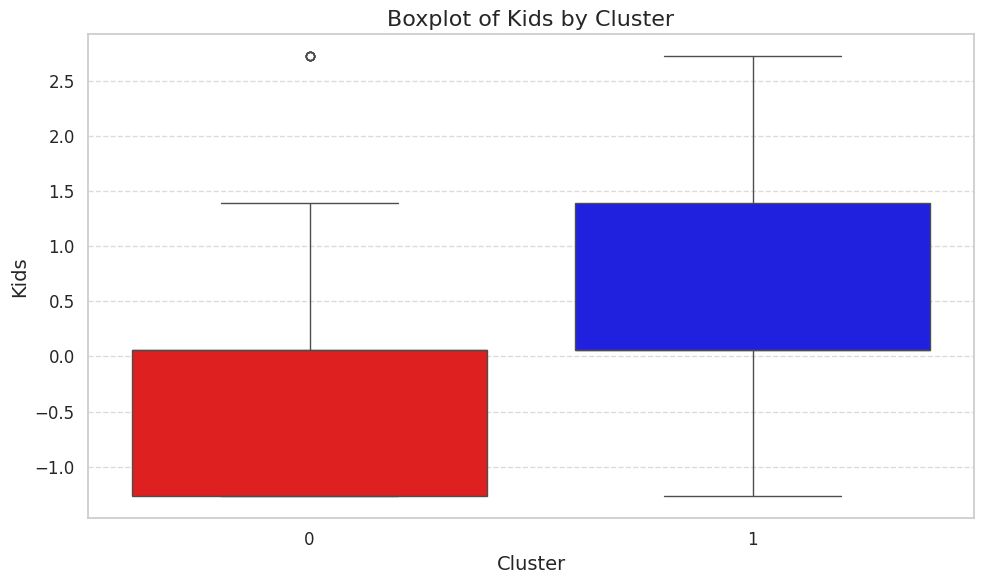

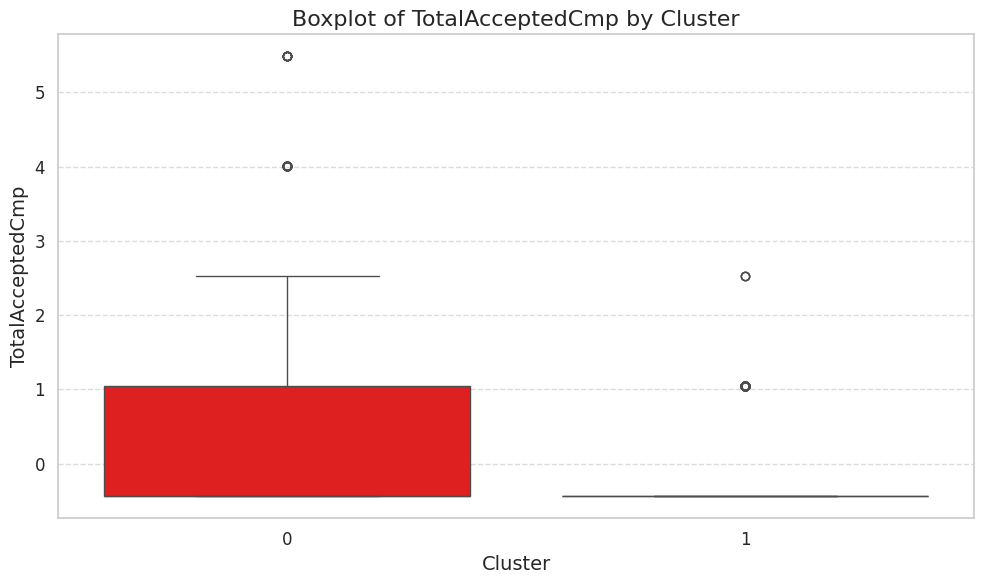

In [110]:
#TODO
# Note that here blue is Low-Value Customer. I considered this assumption
# in order to gain results which resemble notebook previous results
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(
        data=df_scaled,
        x='Cluster',
        y=column,
        hue='Cluster',
        palette={0: 'red', 1: 'blue'},
        dodge=False
    )
    plt.title(f'Boxplot of {column} by Cluster', fontsize=16)
    plt.xlabel('Cluster', fontsize=14)
    plt.ylabel(column, fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend([], [], frameon=False)
    plt.tight_layout()
    plt.show()